# Visualize Trained Neural Network

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from models.LTI_sim import LTISimulator
from models.feedforward import FeedForward, FeedForwardDynamics

from utils.viz import plot_traj, plot_trajs_2d

In [2]:
simulator = LTISimulator()
x_dim, u_dim = simulator.n_x, simulator.n_u
simulator

## Load model from saved checkpoint

In [3]:
filename = 'trained_models/feedforward_hid128'
filename = 'trained_models/feedforward_hid128_2'
model = FeedForwardDynamics(FeedForward(model_path=filename).float())

loading state dict


In [4]:
model

In [5]:
dyn_fn = model.get_model()

## Multistep Visualization

In [6]:
T = 20

# simulate true dynamics using random actions
x = simulator.x0
Xs_true = np.zeros((T+1,x_dim))
Xs_true[0,:] = x
Us_true = simulator.sample_controls(T)

for t in range(T):
    Xs_true[t+1,:] = simulator.f_dt(Xs_true[t,:], Us_true[t,0:])

In [7]:
num_samples = 2

In [8]:
# generate model predictions
dyn_fn = model.get_model(n_samples=num_samples)
# simulate forward
Xs_pred = np.zeros((num_samples,T+1,x_dim))
Xs_pred[:,0,:] = Xs_true[0, :]
for t in range(T):
    # reshape to duplicate across particles
    um = np.repeat( Us_true[t,:][None,:], num_samples, axis=0 ) 
    Xs_pred[:,t+1,:] = dyn_fn(Xs_pred[:,t,:], um)

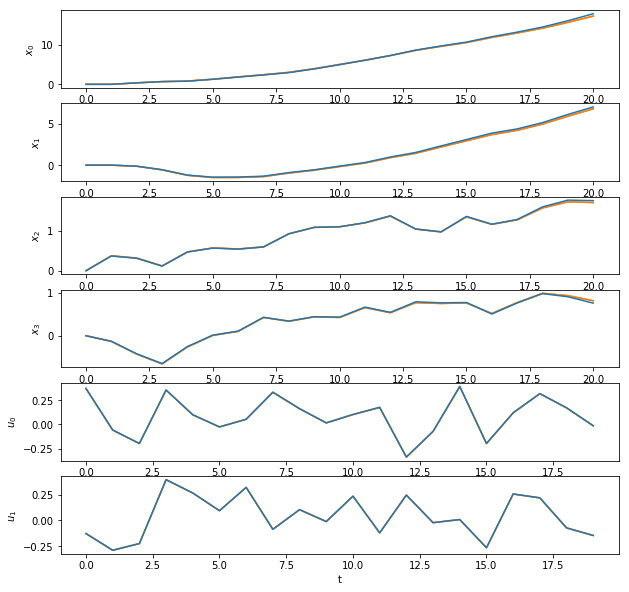

In [9]:
fig, axes = plt.subplots(x_dim + u_dim, figsize=(10,10))
for n in range(num_samples):
    plot_traj(axes, {
        'states': Xs_pred[n,:,:],
        'actions': Us_true
    }, t0=0, color='C1')
    
plot_traj(axes, {
    'states': Xs_true,
    'actions': Us_true})

for j in range(x_dim):
    axes[j].set_ylabel(r"$x_"+str(j)+"$")
for j in range(u_dim):
    axes[x_dim+j].set_ylabel(r"$u_"+str(j)+"$")
axes[-1].set_xlabel('t')
plt.show()

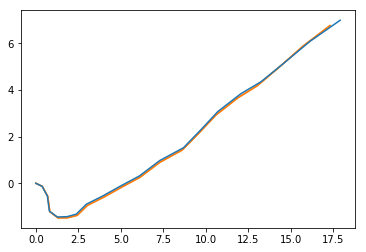

In [10]:
# plot in 2d
plot_trajs_2d(np.swapaxes(Xs_pred,2,1), color='C1')
plt.plot(Xs_true[:,0], Xs_true[:,1].T)